# Question_4: Plot the number of stations per city in function of number of inhabitants.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import src.data_processing.data as data

In [51]:
df = data.facilities
df['city'] = df['city'].str.lower() #gezien je excel in hoofdletters staat, ga je je stations ook in hoofdletters zetten
df.head(5)

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
2,008895000,aalst,Stationsplein 9,9300,aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00
3,008895125,aalst-kerrebroek,Ledebaan,9300,aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
4,008891140,aalter,Stationsplein 2,9880,aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00
5,008833209,aarschot,Statieplein,3200,aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00
6,008892288,aarsele,Hogenhovenstraat Zn,8700,aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


In [52]:
df = df.sort_values(by='city').groupby('city').size().reset_index(name = 'NumberOfStations')
# Ik sorteer eerst op stations & groepeer deze ook op stations
# ik bekijk heet aantal stations per stad en steek deze in nieuwe kolom NumberOfStations

In [53]:
dg = data.inhabitants_per_city
dg.head(5)

,Gemeente,aantal
0,aalst,88000.0
1,aalter,29000.0
2,aarschot,30175.0
3,aarsele,2978.0
4,deux-acren,3988.0


In [54]:
dfsamen = pd.merge(df, dg, left_on='city', right_on=' Gemeente', how='inner')  #we mergen met stad, aantal stations voor deze stad & aantal inwoners per stad   #we houden deze 3 kolommen over
dfsamen.head(5)

,city,NumberOfStations,Gemeente,aantal
0,aalst,2,aalst,88000.0
1,aalter,1,aalter,29000.0
2,aarschot,2,aarschot,30175.0
3,aarsele,1,aarsele,2978.0
4,aiseau-presles,1,aiseau-presles,10500.0


In [55]:
#we maken een dictionary: koppels maken: key + value

d = {range(1,999): '1-999', range(1000,9999): '1000-9999', range(10000,99999): '10000-99999', range(100000,999999): '100000-999999', range(1000000,9999999): '1000000-9999999'}

#elke city wordt ingedeeld per categorie ( loopachtig via lambda functie )
dfsamen['categorie'] = dfsamen[' aantal'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
dfsamen

,city,NumberOfStations,Gemeente,aantal,categorie
0,aalst,2,aalst,88000.0,10000-99999
1,aalter,1,aalter,29000.0,10000-99999
2,aarschot,2,aarschot,30175.0,10000-99999
3,aarsele,1,aarsele,2978.0,1000-9999
4,aiseau-presles,1,aiseau-presles,10500.0,10000-99999
...,...,...,...,...,...
444,zingem,1,zingem,7000.0,1000-9999
445,zonhoven,1,zonhoven,21237.0,10000-99999
446,zottegem,1,zottegem,25073.0,10000-99999
447,zwalm,1,zwalm,8000.0,1000-9999


In [56]:
dfsamen = dfsamen.sort_values(by=['categorie','NumberOfStations']).groupby(['categorie','NumberOfStations']).size().reset_index(name='aantal')
#aantal = aantal gemeentes met x aantal station in categorie x
dfsamen.head(5)

,categorie,NumberOfStations,aantal
0,0,1,1
1,1-999,1,22
2,1000-9999,1,171
3,1000-9999,2,11
4,1000-9999,3,2


In [57]:
#pivot: Kolom Number of stations wordt nu rij 1 &
# uw categorie verschijnt maar 1 keer meer
#index = kolom '0'
#columns = NumberOfStations

dfsamen = dfsamen.pivot_table(index=['categorie'], columns = ['NumberOfStations'], values = ['aantal'], fill_value = 0, aggfunc = 'sum')
dfsamen.head(5)

aantal                 
NumberOfStations      1   2   3  4  5  7
categorie                               
0                     1   0   0  0  0  0
1-999                22   0   0  0  0  0
1000-9999           171  11   2  0  0  0
10000-99999         185  36  10  0  1  0
100000-999999         4   3   1  1  0  1

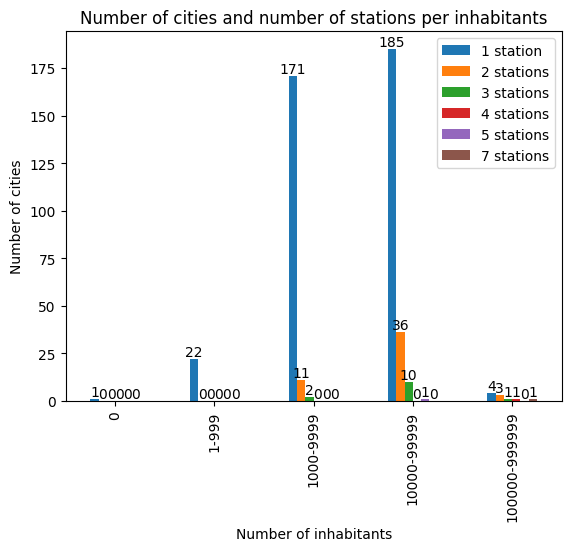

In [58]:
ax = dfsamen.plot.bar()
for container in ax.containers:
    ax.bar_label(container)

ax.legend(['1 station', '2 stations', '3 stations', '4 stations', '5 stations', '7 stations'])
plt.title('Number of cities and number of stations per inhabitants')
plt.ylabel('Number of cities')
plt.xlabel('Number of inhabitants')
plt.show()